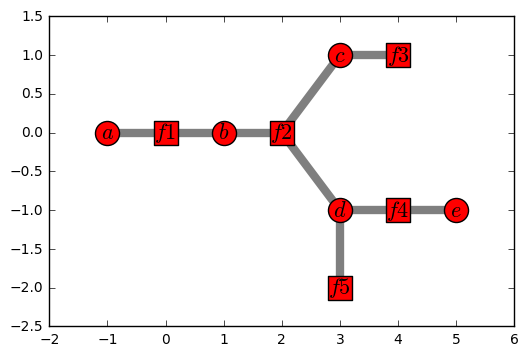

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

pos = {"a":(-1,0), "f1":(0,0), "b":(1,0), "f2":(2,0), "c":(3,1), "f3":(4,1), "d":(3,-1), "f5":(3,-2), "f4":(4,-1), "e":(5,-1)}

G=nx.Graph()
nx.draw_networkx_nodes(G,pos,nodelist=["a","b","c", "d", "e"],node_shape='o')
nx.draw_networkx_nodes(G,pos,nodelist=["f1","f2","f3", "f4", "f5"],node_shape='s')
G.add_edges_from([("a","f1"),("f1","b"), ("b","f2"), ("f2","c"), ("c","f3"), ("f2","d"), ("d","f5"), ("d","f4"), ("f4","e")])

# some math labels
labels={}
labels["a"]=r'$a$'
labels["b"]=r'$b$'
labels["c"]=r'$c$'
labels["d"]=r'$d$'
labels["e"]=r'$e$'
labels["f1"]=r'$f1$'
labels["f2"]=r'$f2$'
labels["f3"]=r'$f3$'
labels["f4"]=r'$f4$'
labels["f5"]=r'$f5$'


# edges
nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw_networkx_edges(G,pos,width=6,alpha=0.5,edge_color='black')


plt.show()


In [2]:
# factors

sup = np.array([1,2])
e = np.array([1,2])
d = np.array([1,2])
c = np.array([1,2])
a = np.array([1,2])
b = np.array([1,2])
f5 = 3-d 
f3 = np.asmatrix(3-c)
f4 = np.zeros((2,2))
f1 = np.zeros((2,2))
f2 = []
for i in d:
    for j in e:
        f4[i-1,j-1] = i*j
        
for i in a:
    for j in b:
        f1[i-1,j-1] = i*j

for i in b:
    for j in c:
        for k in d:
            f_2 =  2*(5-i*j)-k+1
            f2.append(f_2)
               

In [3]:
f2 = np.asarray(f2)
f2 = f2.reshape(4,2)

In [4]:
#Message Passing
import numpy as np

E = np.asmatrix([1,1])
f4_prod_E = f4*E.transpose()
f4_prod_E1 = np.asarray(f4_prod_E)
f4_prod_E1 = f4_prod_E1.reshape(2)
f5_prod_f4E = f4_prod_E1*f5 #Message to d
f5_prod_f4E


array([ 6.,  6.])

In [5]:
f2_new = np.matrix(f2)
f54E_new = np.matrix(f5_prod_f4E.reshape(2,1))
f2_prod_f54E = np.dot(f2_new,f54E_new) #Message to f2
f2_prod_f54E = f2_prod_f54E.reshape(2,2)
f2_prod_f54E

matrix([[ 90.,  66.],
        [ 66.,  18.]])

In [6]:
f3 = np.matrix(f3.reshape(2,1))
f3_prod_f254E = np.dot(f2_prod_f54E,f3) #Message to b
f3_prod_f254E

matrix([[ 246.],
        [ 150.]])

In [7]:
f3_prod_f254E = np.array(f3_prod_f254E)
f3_prod_f254E = f3_prod_f254E.reshape(2)
F_Final = f1*f3_prod_f254E #Message to a
F_Final

array([[ 246.,  300.],
       [ 492.,  600.]])

In [8]:
#Marginal distributions

f_ab = np.zeros([2,2])
bc =F_Final.sum()
for i in range(2):
    for j in range(2):
        f_ab[i][j] = F_Final[i,j]/bc
f_ab

array([[ 0.15018315,  0.18315018],
       [ 0.3003663 ,  0.36630037]])